In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
print(df.head(5))
df.info()

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-

In [3]:
print(df.describe)

<bound method NDFrame.describe of      mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[569 rows x 31 columns]>


In [4]:
print(df.isnull().sum())
print(df.describe())
print(df['target'].value_counts())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
       mean radius  mean texture  ...  worst fractal dimension      target
count   569.0

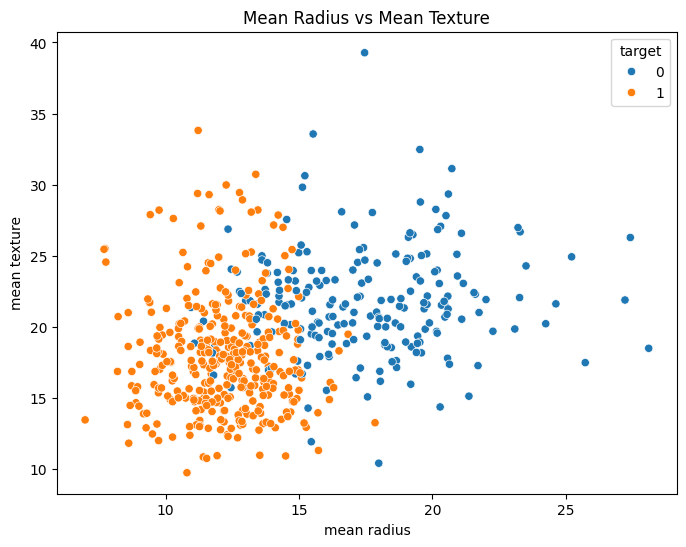

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='mean radius',y='mean texture',hue='target',data=df)
plt.title('Mean Radius vs Mean Texture')
plt.show()

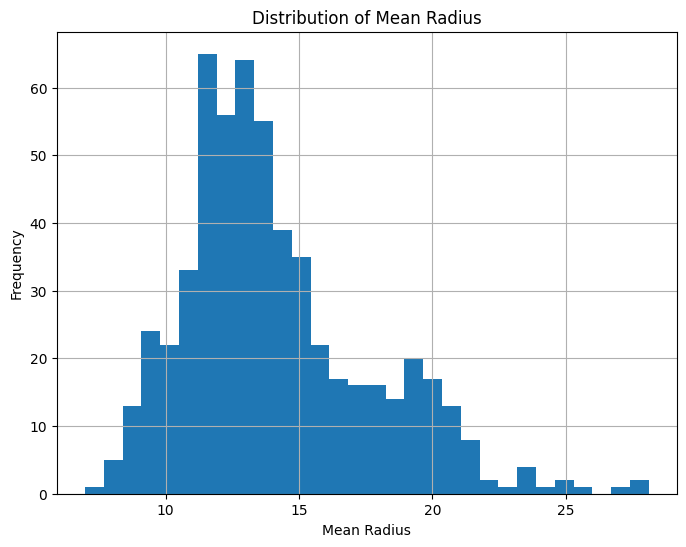

In [7]:
plt.figure(figsize=(8,6))
df['mean radius'].hist(bins=30)
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

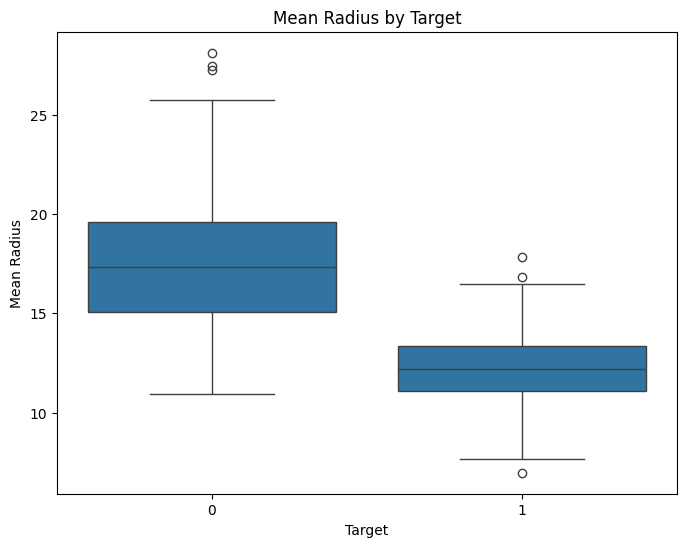

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x='target',y='mean radius',data=df)
plt.title('Mean Radius by Target')
plt.xlabel('Target')
plt.ylabel('Mean Radius')
plt.show()

In [10]:
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
k_values=[3,5,7,9]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy=metrics.accuracy_score(y_test,y_pred)
    print(f"Accuracy for k={k}: {accuracy:.4f}")

Accuracy for k=3: 0.9415
Accuracy for k=5: 0.9591
Accuracy for k=7: 0.9649
Accuracy for k=9: 0.9708
